<a href="https://colab.research.google.com/github/AnsiaNijas/ADS1/blob/main/sentiment_analysis_glove_bilstm_structured.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Pretrained GloVe Embeddings and LSTM on the IMDB Dataset
This tutorial demonstrates how to perform sentiment analysis on the IMDB dataset using pretrained GloVe embeddings and a Bidirectional LSTM model.

## 1. Introduction
Sentiment analysis is a critical natural language processing (NLP) task that determines whether a piece of text expresses a positive, negative, or neutral sentiment. This tutorial explores how to combine GloVe embeddings with LSTM to understand the sentiment in text effectively.

## 2. Setup
Import the required libraries and packages for this project.

## 3. Load Data
Load the IMDB dataset using TensorFlow Datasets.

## 4. Preprocess Data
Prepare the data for training by tokenizing text, creating sequences, and padding them to uniform lengths.

## 5. Build Model
Define the architecture of the sentiment analysis model using GloVe embeddings and Bidirectional LSTM.

## 6. Train and Evaluate
Train the model on the prepared data and evaluate its performance on the test set.

## 7. Export Model
Save the trained model for future inference.

## 8. Visualizations
Generate plots to visualize the training and validation accuracy and loss.

## 9. Conclusion
Summarize the results and discuss possible future improvements to the model.

## **4. Code Walkthrough**
### **Setup: Preparing the Environment**

In this step, we prepare the environment by importing the necessary libraries and dependencies required for the tutorial. Each library serves a specific purpose in the workflow:

1. **`numpy`**:
   - Used for numerical computations, such as creating and manipulating arrays.
   - Essential for working with the embedding matrix for GloVe.

2. **`tensorflow`**:
   - The primary framework used to build, train, and evaluate machine learning models.
   - Provides utilities for neural network layers, optimization algorithms, and training workflows.

3. **`tensorflow_datasets`**:
   - A module that simplifies dataset loading and preprocessing.
   - It will be used to import the IMDB dataset, which is pre-split into training and testing sets.

4. **`tensorflow.keras.preprocessing.text`**:
   - Provides tools to process textual data by tokenizing words into sequences of integers.

5. **`tensorflow.keras.preprocessing.sequence`**:
   - Used to pad or truncate sequences to ensure they have uniform length, making them suitable for input to the model.

6. **`os`**:
   - Enables interaction with the operating system.
   - Will be used to load the GloVe embeddings from local storage.

By importing these libraries, we set up the foundational tools needed to complete the rest of the tutorial, such as data preparation, model building, training, and evaluation.



In [20]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
import matplotlib.pyplot as plt

## Load the IMDB Dataset
This step uses TensorFlow Datasets (tfds) to load the IMDB dataset, which contains 50,000 movie reviews labeled as positive or negative. The tfds.load() function splits the dataset into training and testing sets, prepares the data as input-label pairs, and provides metadata for reference.

This prepares the data for preprocessing in the next step.

In [3]:
# Load IMDB dataset
(train_data, test_data), info = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.PXUITJ_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.PXUITJ_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.PXUITJ_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


# Exploring the IMDB Dataset
Let's explore the IMDB dataset to understand its structure and content. After loading the dataset, exploring it is a crucial step to ensure we are familiar with the data format, features, and labels. This will help us prepare the data effectively for modeling.

In [5]:
# Check the dataset metadata
print(info)

# Display a few examples from the training data
for text, label in train_data.take(3):
    print(f"Review: {text.numpy().decode('utf-8')}")
    print(f"Label: {label.numpy()}\n")

# Count the number of examples in the training and testing sets
train_count = len(list(train_data))
test_count = len(list(test_data))
print(f"Number of training examples: {train_count}")
print(f"Number of testing examples: {test_count}")


tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmp67tz5176tfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

## Preprocess the Data
Now that we’ve loaded the dataset, let’s extract the sentences (reviews) and their corresponding labels to prepare the data for further processing. This step ensures the data is in a structured format that the model can understand.

In [6]:
# Extract sentences and labels
train_sentences, train_labels = [], []
test_sentences, test_labels = [], []

for s, l in train_data:
    train_sentences.append(s.numpy().decode('utf8'))
    train_labels.append(l.numpy())

for s, l in test_data:
    test_sentences.append(s.numpy().decode('utf8'))
    test_labels.append(l.numpy())

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

#### **What’s Happening Here?**
- **Extracting Sentences**:  
  We iterate through the training and testing datasets to extract the movie reviews. Each review, initially stored as a tensor, is converted to plain text using `.numpy().decode('utf8')`.

- **Extracting Labels**:  
  Alongside the reviews, we extract the sentiment labels. Labels are integers, where `0` indicates a negative review and `1` indicates a positive review.

- **Converting Labels to Arrays**:  
  Finally, the labels are converted into numpy arrays. This makes them compatible with the machine learning tools we’ll use later.

#### **Why Is This Important?**
By separating reviews and labels into different lists, we prepare the dataset for tokenization, padding, and model training. This is a critical step in transforming raw data into a format suitable for natural language processing tasks.

Let’s move on to the next step, where we tokenize and prepare the text for the model!

## Tokenize and Pad Sequences
In this step, we process the text data into a numerical format that the machine learning model can understand. This involves tokenizing the text into sequences of integers and then padding these sequences to ensure uniform input length.

In [7]:
# Parameters
vocab_size = 20000
embedding_dim = 100
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#### **What’s Happening Here?**
**Tokenizing**: Converting words into integers using the Tokenizer.

**Padding**: Ensuring all sequences are of the same length by truncating or adding padding.
#### **Why Are We Doing This?**
Models work with numbers, not raw text. Consistent sequence length ensures compatibility with the neural network.

This step transforms the text data into a numerical format that is consistent and ready for input into the model. Now, we can move on to embedding!

## Load Pretrained GloVe Embeddings
Now that we have tokenized and padded the text data, let’s bring in pre-trained GloVe embeddings to add semantic meaning to our words. These embeddings are widely used in NLP tasks because they capture relationships between words based on their co-occurrence in large corpora.

#### **What’s Happening Here?**
**Downloading GloVe Embeddings**:

First, we download the GloVe embeddings file from Stanford’s repository. This file contains pre-trained word vectors for a vocabulary of words

In [8]:
# Download GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip -d ./glove.6B/

--2024-12-11 17:36:07--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-11 17:36:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-11 17:36:07--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

**Loading Embeddings:**

Next, we load these embeddings into a Python dictionary. In this dictionary:
Each key is a word from the vocabulary.
Each value is a vector representing the semantic meaning of the word.

In [9]:
# Load embeddings into a dictionary
embeddings_index = {}
with open('./glove.6B/glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

#### **Why Are We Doing This?**
GloVe embeddings capture the relationships and similarities between words, such as synonyms or words used in similar contexts. By using these pre-trained embeddings, the model starts with a strong understanding of word meanings without needing to learn them from scratch. This significantly improves the model's performance, especially when working with smaller datasets, as it improves knowledge from large, pre-trained corpora.

With the embeddings loaded, we are now ready to integrate them into the model architecture to enhance its understanding of semantic relationships! Let’s proceed to the next step.

## Create Embedding Matrix
Now that we’ve loaded the GloVe embeddings, let’s create an embedding matrix that will map the words in our dataset to their corresponding GloVe vectors. This matrix will serve as the foundation for the embedding layer in our model.

In [10]:
# Create embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

This embedding matrix is now ready to be integrated into the embedding layer of our model. Let’s proceed to build the model!

# Build the Model
Now, let’s build our model for sentiment analysis. This model is designed to use GloVe embeddings, a Bidirectional LSTM layer, and dense layers for binary classification.

#### **What Are We Doing?**
**Building the Model Architecture:**

**Embedding Layer:**
Uses the pre-trained GloVe embedding matrix to convert words into meaningful vector representations.
Set as trainable=False to keep the pretrained embeddings fixed during training.

**Bidirectional LSTM:**
Processes text sequences in both forward and backward directions, improving the model's ability to capture context.
Contains 64 units for learning long-term dependencies.

**Dense Layer:**
A fully connected layer with 64 units and ReLU activation to extract features.

**Dropout Layer:**

Adds a 50% dropout rate to prevent overfitting during training.

**Output Layer:**

A single neuron with sigmoid activation to output a probability for binary classification (positive or negative sentiment).


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.build(input_shape=(None, max_length))  # Specify the input shape



Now that we’ve built the model, let’s print the model summary to understand its structure and the number of parameters.

In [14]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          84,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,092,801 (7.98 MB)

 Trainable params: 92,801 (362.50 KB)

 Non-trainable params: 2,000,000 (7.63 MB)

#Compile the Model
After building the model, the next step is to compile it. Compiling the model sets up the loss function, optimizer, and evaluation metrics, which define how the model learns and measures its performance.

Compiling the model involves defining key components that guide its learning process. First, we set the loss function to binary_crossentropy, which measures the difference between the predicted and actual labels for our binary classification task. Next, we choose the optimizer, adam, to adjust the model’s weights efficiently during training and minimize the loss. Finally, we specify accuracy as the evaluation metric, allowing us to monitor how often the model correctly predicts the sentiment. This step ensures the model is ready for training by defining how it learns and evaluates performance.

In [15]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## Train the Model

Let’s train the model to learn the patterns in the data. We provide the training data and labels so the model can understand how to classify sentiments. We also use validation data to monitor its performance on unseen data during training. By repeating the process for 10 epochs, the model gradually improves its accuracy. After training, the model will be ready for evaluation and predictions!

In [23]:
# Train the model
num_epochs = 10
history = model.fit(
    train_padded,
    train_labels,
    epochs=num_epochs,
    validation_data=(test_padded, test_labels),
    verbose=2
)

Epoch 1/10
782/782 - 147s - 188ms/step - accuracy: 0.9245 - loss: 0.1811 - val_accuracy: 0.8013 - val_loss: 0.6052
Epoch 2/10
782/782 - 196s - 251ms/step - accuracy: 0.9408 - loss: 0.1500 - val_accuracy: 0.8008 - val_loss: 0.6232
Epoch 3/10
782/782 - 146s - 187ms/step - accuracy: 0.9529 - loss: 0.1214 - val_accuracy: 0.8001 - val_loss: 0.7256
Epoch 4/10
782/782 - 198s - 253ms/step - accuracy: 0.9589 - loss: 0.1003 - val_accuracy: 0.7832 - val_loss: 0.8311
Epoch 5/10
782/782 - 144s - 184ms/step - accuracy: 0.9689 - loss: 0.0813 - val_accuracy: 0.7991 - val_loss: 0.9301
Epoch 6/10


KeyboardInterrupt: 

## Evaluate the Model

Let’s evaluate the model to see how well it performs on unseen data. We use the test dataset to calculate the accuracy and loss, which give us an idea of the model’s overall effectiveness. This step helps us understand how well the model can generalize to new inputs. Let’s check the test accuracy to assess our model’s performance!

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(test_padded, test_labels)
print(f'Test Accuracy: {accuracy:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.8027 - loss: 0.5244
Test Accuracy: 0.8010


## Save the Model

Let’s save the trained model so we can reuse it later for predictions or further analysis without retraining. This ensures we preserve all the progress made during training and makes the model ready for deployment or sharing!

In [18]:
# Save the model
model.save('sentiment_analysis_glove_bilstm.h5')

# Plotting Training and Validation Accuracy
Lets plot the training and validation accuracy which will helps us to understand how well the model is learning over time. By plotting the accuracy for each epoch, we can analyze the Learning Progress, Monitor Generalization and Identify Issues.

#### **What Are We Doing?**

We extract accuracy values from the training history (`history.history['accuracy']` for training accuracy and `history.history['val_accuracy']` for validation accuracy). By plotting the training accuracy, we can observe how the model improves as it learns from the data during training. Similarly, plotting the validation accuracy allows us to monitor the model’s performance on unseen data, giving insights into its generalization ability.

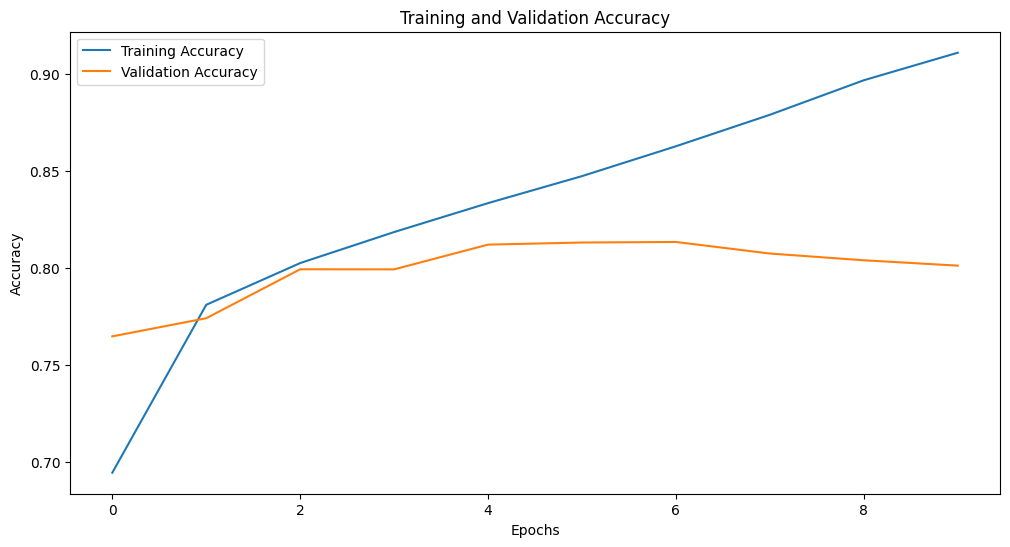

In [21]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Let’s plot the training and validation loss over the epochs to understand the model’s learning behavior during training. By visualizing the loss, we can see how well the model is minimizing errors on the training data and how it performs on unseen validation data. This helps us evaluate if the model is learning effectively and identify potential issues like overfitting or underfitting. Let’s analyze the trends in the loss to ensure balanced learning!

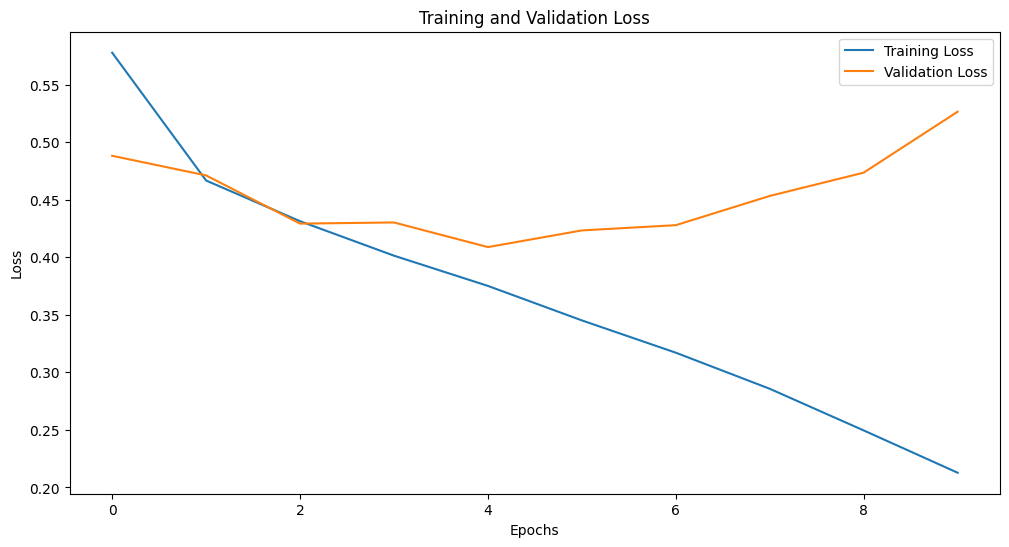

In [22]:
# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Load and Use the Model
Let’s load the saved model and use it to predict sentiment for new text data. First, we load the model from the saved file. Then, we process the new input text by tokenizing and padding it, just like we did during training. Finally, we pass the prepared data to the model for prediction, where the output indicates the sentiment: closer to 1 for positive and closer to 0 for negative.

This step shows how to apply the trained model to real-world scenarios!

In [24]:
# Load the model
loaded_model = tf.keras.models.load_model('sentiment_analysis_glove_bilstm.h5')

# Predict on new data
sample_text = ["The movie was fantastic! I really enjoyed it."]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
prediction = loaded_model.predict(sample_padded)
print(f'Prediction: {prediction[0][0]:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
Prediction: 0.9969
